<a href="https://colab.research.google.com/github/shailavij/Cognite_Repo/blob/main/Dataqualitychk_Timeseriesdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Completeness score of time series

It is important to know how complete a time series is. In this example, the function qualifies a time series on the basis of its completeness score as good, medium, or poor. The completeness score measures how complete measured by how much of the data is missing based on its median sampling frequency.

A time series ranging from 1975/05/09 to 1975/05/20 with sampling frequency of 1 hours are taken and 10%, 30% and 50% data are removed at random locations to create three new time series. The algorithm classifies the time series as good, medium, and poor based on the completeness score

In [ ]:
!pip install indsl

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from indsl.data_quality.completeness import completeness_score
from indsl.signals.generator import insert_data_gaps, line

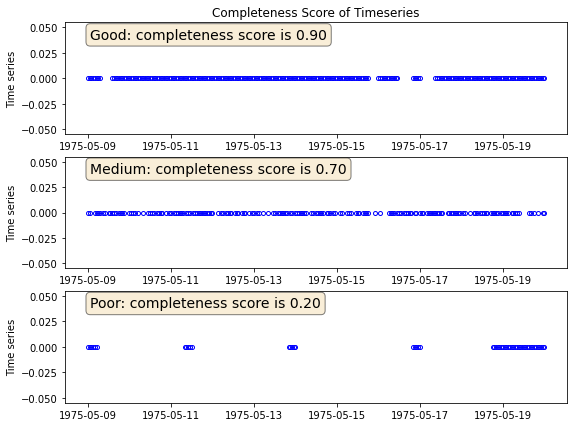

In [ ]:
start = pd.Timestamp("1975/05/09")
end = pd.Timestamp("1975/05/20")

# Create a time series with four gaps of random location and size

data = line(start_date=start, end_date=end, slope=0, intercept=0, sample_freq=pd.Timedelta("1 h"))
ts_mult_gaps_1 = insert_data_gaps(data=data, fraction=0.10, method="Multiple", num_gaps=4)
ts_mult_gaps_2 = insert_data_gaps(data=data, fraction=0.30, method="Random", num_gaps=10)
ts_mult_gaps_3 = insert_data_gaps(data=data, fraction=0.80, method="Multiple", num_gaps=4)

props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 7))
ax1.plot(ts_mult_gaps_1, "bo", mec="b", markerfacecolor="None", markersize=4)
ax1.text(
    0.05,
    0.95,
    completeness_score(ts_mult_gaps_1),
    transform=ax1.transAxes,
    fontsize=14,
    verticalalignment="top",
    bbox=props,
)
ax1.set_ylabel("Time series")
ax1.set_title("Completeness Score of Timeseries")

ax2.plot(ts_mult_gaps_2, "bo", mec="b", markerfacecolor="None", markersize=4)
ax2.text(
    0.05,
    0.95,
    completeness_score(ts_mult_gaps_2),
    transform=ax2.transAxes,
    fontsize=14,
    verticalalignment="top",
    bbox=props,
)
ax2.set_ylabel("Time series")

ax3.plot(ts_mult_gaps_3, "bo", mec="b", markerfacecolor="None", markersize=4)
ax3.text(
    0.05,
    0.95,
    completeness_score(ts_mult_gaps_3),
    transform=ax3.transAxes,
    fontsize=14,
    verticalalignment="top",
    bbox=props,
)
ax3.set_ylabel("Time series")

plt.show()